<a href="https://colab.research.google.com/github/DRKAFLE123/IrisClassification/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris multiclass-Classifcation using machine learning

In [1]:
# Iam using dataset from kaggle IRIS.csv for MultiClassClassification

## The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split



In [3]:
import warnings
warnings.filterwarnings('ignore')
# Ignoring the warnings that might come in the process

In [4]:
data = pd.read_csv('/content/IRIS.csv')


In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape  #150 rows and 5 columns

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
data['species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Data Preprocessing

In [11]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
# Check for null values along axis 0 or axis =1 #to check null value in row or column
is_any_null = data.isnull().any(axis=0)
is_any_null

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

## Data visualization for analysing the features relations

In [13]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Pairplot to see all features relation

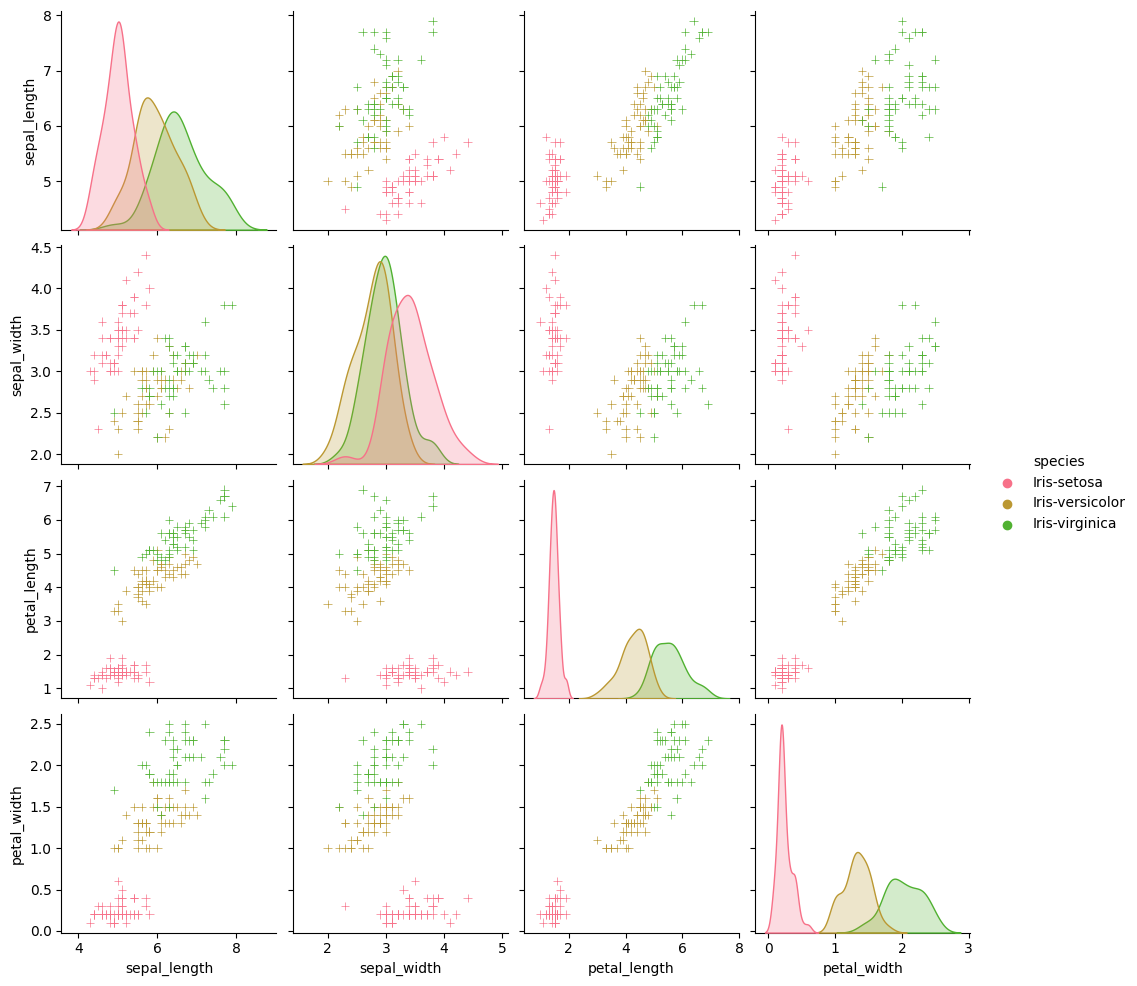

In [14]:

sns.pairplot(data, hue='species', markers='+')
plt.show()

### We will create a violin plot using sns.violinplot() and pass the data as input. The plot is then displayed using plt.show(). You can customize the plot by modifying the plot title, x-label, y-label, colors, etc., as per your requirements.

A violin plot plays a similar activity that is pursued through whisker or box plot do. As it shows several quantitative data across one or more categorical variables. It can be an effective and attractive way to show multiple data at several units. A “wide-form” Data Frame helps to maintain each numeric column which can be plotted on the graph. It is possible to use NumPy or Python objects, but pandas objects are preferable because the associated names will be used to annotate the axes.

Parameters:
- x, y, hue: Inputs for plotting long-form data. #we can add hue but not added here
- data: Dataset for plotting.
- scale: The method used to scale the width of each violin. #scale=’area’

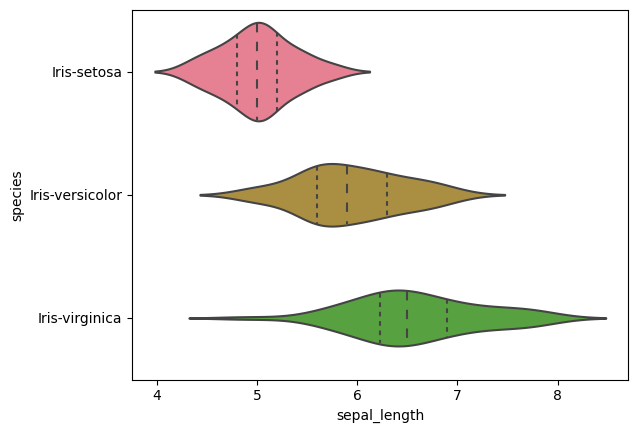

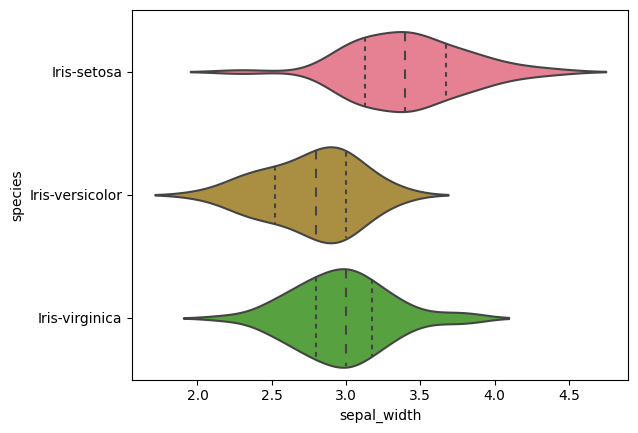

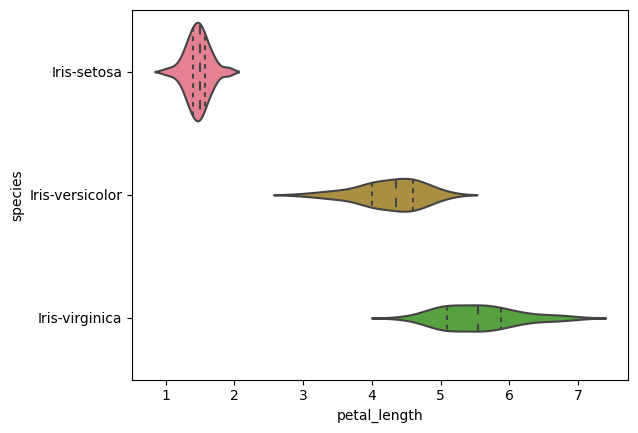

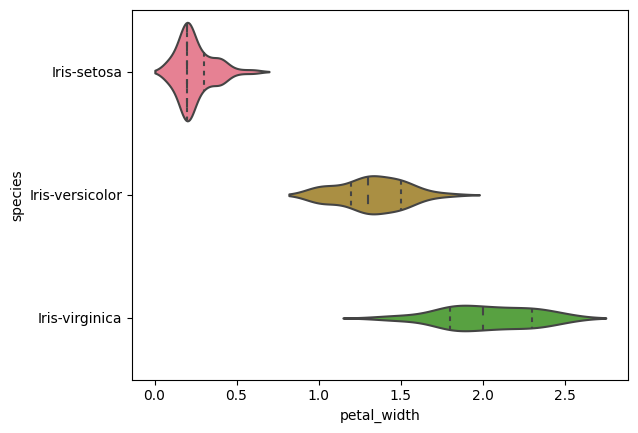

In [15]:
v= sns.violinplot(y='species', x='sepal_length', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='species', x='sepal_width', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='species', x='petal_length', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='species', x='petal_width', data=data, inner='quartile')
plt.show()


# Heatmap to see correlation

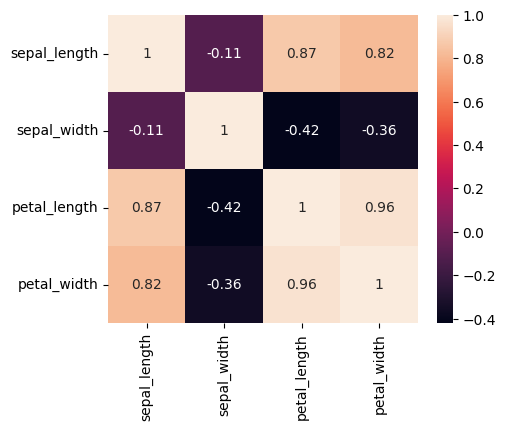

In [16]:
# Finding correlation between all variables
corr = data.corr()
fig, ax = plt.subplots(figsize =(5,4))
sns.heatmap(corr, annot = True, ax = ax)
plt.show()

# Modeling with SK learn

In [17]:
X = data.drop(['species'], axis=1)
y = data['species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


# Label Encoder
Changing the categorical value into integer if we want otherwise no need

In [18]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

# # Changing the class label into integer values (0,1,2)
# data['species'] = encoder.fit_transform(data['species'])
# data.head()

## Split the dataset into a training set and a testing set¶

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


# KNeighboursClassifier

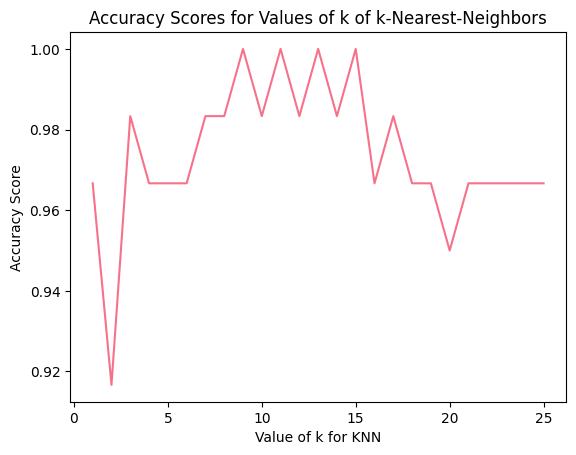

In [20]:
# experimenting with different n values
k_range = list(range(1,26)) #hyperparameters tunning
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# LogisticRegression

In [21]:
modelL = LogisticRegression()
modelL.fit(X_train, y_train)
y_pred = modelL.predict(X_test)

lscore=metrics.accuracy_score(y_test, y_pred)
print(lscore)
#plot y_pred vs y_test

0.9833333333333333


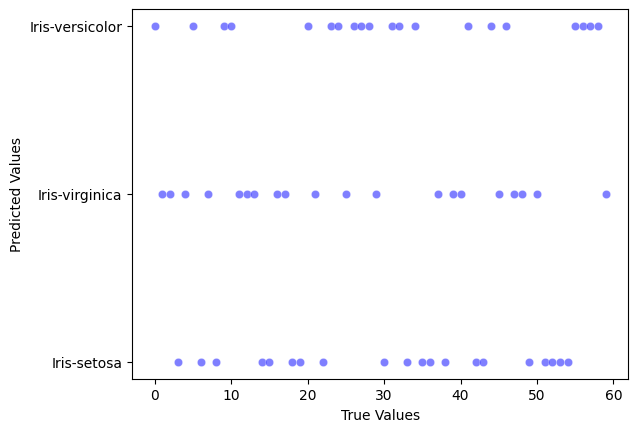

In [22]:

# Create scatter plot using Seaborn

sns.scatterplot( y_pred,  color='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

sns.set(style='whitegrid')

# Choosing KNN to Model Iris Species Prediction with k = 12 after evaluating above score
After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [23]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)
ypred_knn=knn.predict(X_test)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)

In [25]:
knn_score=metrics.accuracy_score(y_test, ypred_knn)

# Decision Tree

In [26]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

dtree_model = tree.DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

ypred_dtree = dtree_model.predict(X_test)


print(classification_report(y_test, ypred_dtree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.95      0.90      0.93        21
 Iris-virginica       0.90      0.95      0.92        19

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



In [27]:
dt_score = accuracy_score(y_test, ypred_dtree)

# SUPPORT VECTOR MACHINE (SVC)

In [28]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

ypred_svc = svc_model.predict(X_test)
print(classification_report(y_test, ypred_svc))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



In [29]:
svm_score= accuracy_score(y_test, ypred_svc)

# PLOTTING THE accuracy Score of different classification algrothim

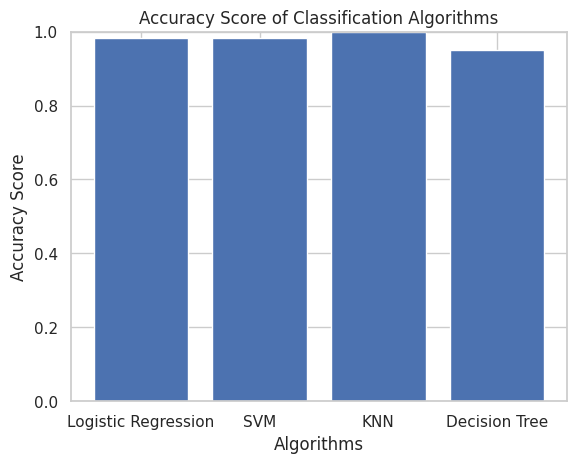

In [30]:
accuracy_scores = [lscore, svm_score, knn_score, dt_score]
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
plt.bar(algorithms, accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Classification Algorithms')
plt.ylim(0, 1)
plt.show()


# From here we can conclude that KNN(KNearest Neighbour) algorithm has given the best result so we can make model only using KNN as final model